Data pre-processsing
- Downloaded "leaked and non-leaked" water pipe images from google using "Image Downloader"
- Remove irrelevant (ie; human body in leaked water pipe file) images manually
- Most irrelevant images pops up as you start scrolling down 

Image Augmentation
- This notebook includes functions to augment images
- types of augmentation includes flipping, brightness enhancing, shifting for each images

- function to select single image from dataset : https://stackoverflow.com/questions/63355107/keras-imagedatagenerator-result-display-flow

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# generate batches
datagen = ImageDataGenerator(rescale=1./255)

# define path 
path = r'C:\Users\liewg\OneDrive\Desktop\water pipe detection'

# load image
height = 500
width = 500

# define dataset for leaked and non leaked images
leaked_ds = datagen.flow_from_directory(path , target_size = (height,width),classes=['dataset_leaked'])
nonLeaked_ds = datagen.flow_from_directory(path, target_size = (height,width),classes=['dataset_unleaked'])

# check shape of each image
leaked_ds[0][0].shape

Found 312 images belonging to 1 classes.
Found 293 images belonging to 1 classes.


(32, 500, 500, 3)

C:\Users\liewg\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


KeyboardInterrupt: 

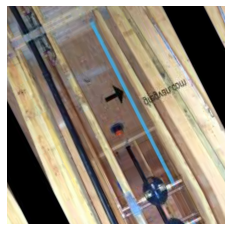

In [44]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#define layers 
flip = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# define where to save augmented images
directory = r'C:\Users\liewg\OneDrive\Desktop\water pipe detection\unleaked_flip'

# iterate every images
cnt = 0  # variable to generate unique name for each images
Iterate_num = 312
for _ in range(Iterate_num):
    img, label = nonLeaked_ds.next() # iterate each image in dataset
    flipped = flip(img[0]) # operate flipping on single image
    plt.axis('off') # remove axis plot for image 
    plt.imshow(flipped) # show flipped image 
    filename = '\\flip'+ str(cnt) + ".jpg" # create unique filename for each image
    plt.savefig(directory+filename) # save flipped image
    cnt += 1 # increment count for each image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

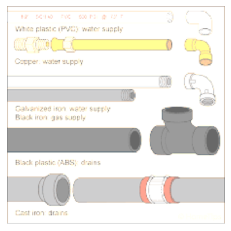

In [45]:
# enhance brightness for images 

# define where to save augmented images
directory = r'C:\Users\liewg\OneDrive\Desktop\water pipe detection\unleaked_bright'

# iterate every images
cnt = 0  # variable to generate unique name for each images
Iterate_num = 150
for _ in range(Iterate_num):
    img, label = nonLeaked_ds.next() # iterate each image in dataset
    
    # define brightness setting
    seed = (cnt, 0)  # tuple of size (2,) - change i to get random brightness (random number initializer)
    stateless_random_brightness = tf.image.stateless_random_brightness(img[0], max_delta=0.64, seed=seed)
    plt.axis('off') # remove axis plot for image 
    plt.imshow(stateless_random_brightness) # show flipped image 
    filename = '\\bright_unleaked'+ str(cnt) + ".jpg" # create unique filename for each image
    plt.savefig(directory+filename) # save flipped image
    cnt += 1 # increment count for each image

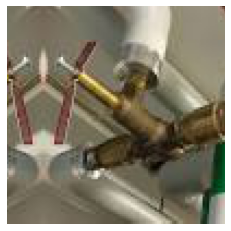

In [47]:
# define where to save augmented images
directory = r'C:\Users\liewg\OneDrive\Desktop\water pipe detection\unleaked_translate'

# iterate every images
cnt = 0  # variable to generate unique name for each images
Iterate_num = 150
for _ in range(Iterate_num):
    img, label = nonLeaked_ds.next() # iterate each image in dataset
    
    translate = tf.keras.layers.RandomTranslation(height_factor=0.4, width_factor=0.4)
    translated = translate(img[0])
    plt.axis('off') # remove axis plot for image 
    plt.imshow(translated) # show flipped image 
    filename = '\\translate_unleaked_'+ str(cnt) + ".jpg" # create unique filename for each image
    plt.savefig(directory+filename) # save flipped image
    cnt += 1 # increment count for each image